##Encontrar os melhores potenciais clientes.

O banco Thera Bank possui uma base de clientes crescente. A maioria
desses clientes são passivos (depositantes) com depósitos de tamanhos
variados. O número de clientes que também são devedores (clientes de
ativos) é bastante pequeno, e o banco está interessado em expandir essa
base rapidamente para trazer mais negócios de crédito e, no processo,
ganhar mais com os juros dos empréstimos. Em particular, a administração
deseja explorar maneiras de converter seus clientes passivos em clientes de
empréstimos pessoais (enquanto os mantém como depositantes). Uma
campanha que o banco realizou no ano passado para clientes passivos
mostrou uma taxa de conversão saudável de mais de 9% de sucesso. Isso
encorajou o departamento de marketing de varejo a elaborar campanhas
para melhor direcionar o marketing, a fim de aumentar a taxa de sucesso
com um orçamento mínimo.
O departamento quer construir um modelo de classificação que os
ajude a identificar os clientes potenciais com maior probabilidade de
adquirir o empréstimo. Isso aumentará a taxa de sucesso e, ao mesmo
tempo, reduzirá o custo da campanha.
A base de dados histórica contém informações pessoais dos clientes e
informações sobre produtos contratados. O arquivo também contém um
dicionário das variáveis.
Arquivo: Bank_Personal_Loan_Modelling.xlsx
Case: Thera Bank
E

##Import das bibliotecas

In [67]:
import pandas as pd
import numpy as np
import plotly.express as px

##Leitura e carregamento dos dados

In [68]:
df = pd.read_excel("/content/[Copy] -  Bank_Personal_Loan_Modelling.xlsx", sheet_name = "Data")

###Analise exploratória

In [69]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [71]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [72]:
#ID	Customer ID							
#Age	Customer's age in completed years							
#Experience	#years of professional experience							
#Income	Annual income of the customer ($000) - Renda Renda anual do cliente						
#ZIPCode	Home Address ZIP code.							
#Family	Family size of the customer							
#CCAvg	Avg. spending on credit cards per month ($000) - Avg. gastos com cartões 	Pode ser variavel target						
#Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
#Mortgage	Value of house mortgage if any. ($000)							
#Personal Loan	-Empréstimo Pessoal Este cliente aceitou o empréstimo pessoal oferecido na última campanha?						
#Securities Account	Does the customer have a securities account with the bank?							
#CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
#Online	Does the customer use internet banking facilities?							
#CreditCard	Does the customer use a credit card issued by UniversalBank?							

In [73]:
# Através da análise das variáveis e do dicionário, algums informações relevantes:


# Variáveis categóricas:
# Personal Loan (Empréstimo Pessoal) - Este cliente aceitou o empréstimo pessoal oferecido na última campanha? Esta é a nossa variável alvo
# Securities Account (Conta de títulos) - O cliente possui conta de títulos no banco?
# CD Account (Conta de CD) - O cliente tem uma conta de certificado de depósito (CD) no banco?
# Online - O cliente usa serviços de banco pela Internet?
# Credit Card - (Cartão de crédito) - O cliente usa um cartão de crédito emitido pelo UniversalBank?

# Variáveis contínuas:

# Age (Idade) Idade do cliente
# Experience (Experiência) - anos de experiência
# Income (Renda) - Renda anual em dólares
# CCAvg (CCAvg) - gasto médio com cartão de crédito
# Mortage (Hipoteca) - Valor da hipoteca da casa

# Variáveis ​​categóricas ordinais:
# Family (Família) - tamanho da família do cliente
# Education (Educação) - nível de educação do cliente


# A variável ID não adiciona nenhuma informação interessante. 
# Não há associação entre o ID de cliente de uma pessoa e o empréstimo, também não fornece nenhuma conclusão geral para futuros clientes de empréstimo em potencial. 
# Podemos desconsiderar essas informações para o modelo.
# Zip code também pode ser descosiderada, uma vez que a informação de distnância entre zip code pode não ser realidade


In [74]:
#Excluindo variáveis não úteis

df = df.drop(columns = ["ID","ZIP Code"])

In [75]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [76]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


##Divisão da base de dados em treino/teste

In [77]:
# Distruibuição da variáveis target
df["Personal Loan"].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

In [78]:
# Pelo fato da base ser desbalanceada, não iremos usar toda a classe 0.
# Iremos pegar uma amostra e juntar com o registros da classe 1 para podermos modelar de forma mais justa.

df_classe_1 = df[df["Personal Loan"] == 1]
df_classe_0 = df[df["Personal Loan"] == 0].sample(n=1500)
df = df_classe_1.append(df_classe_0)

In [79]:
# Dividindo preditores (X) e variável target (Y)

X = df.drop(columns=["Personal Loan"])
Y = df["Personal Loan"]

In [80]:
# Dividindo a base em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (1584, 11)
Shape y_train: (1584,)
Shape X_test: (396, 11)
Shape y_test: (396,)


In [81]:
# Normalização das variáveis

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformanda para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [82]:
# Classificador KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scores_list = []
K_neighbors= range(3,15)

for k in K_neighbors:
  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Acurácia')

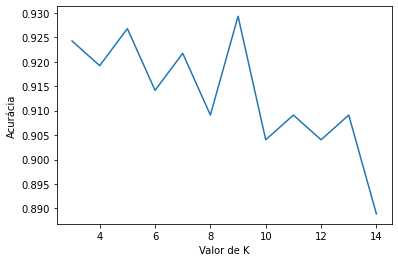

In [83]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(K_neighbors, scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [ ]:
# Melhores valores:
# K=5 e 9
# Accuracy = 0.93